<a href="https://colab.research.google.com/github/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/blob/main/05_Image_Video_OpenCV/05_yolov5_inference/yolov5_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-1-28 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


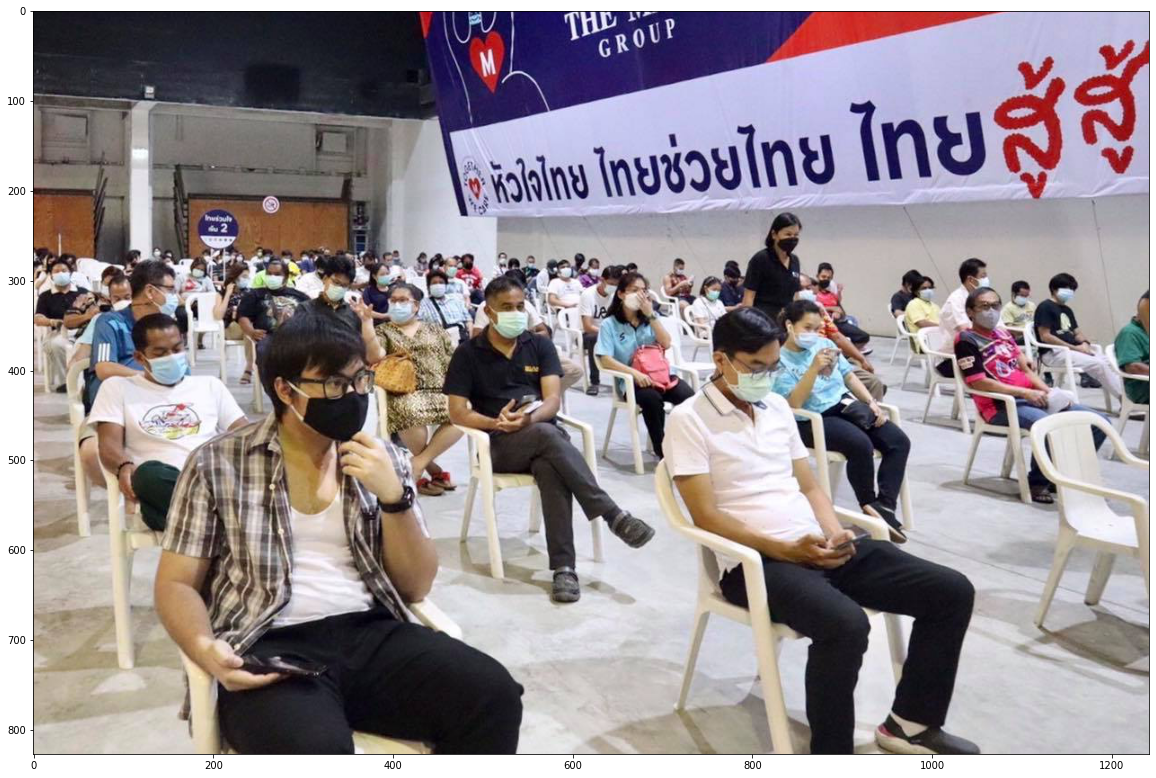

In [2]:
url = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/05_Image_Video_OpenCV/05_yolov5_inference/demo1.jpg"

img1 = io.imread(url)

plt.figure(figsize=(20,20))
plt.imshow(img1)

In [3]:
# Inference
results1 = model(img1)



/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [4]:
results1.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,129.962845,320.895691,545.406921,825.024902,0.903863,0,person
1,701.919067,333.581665,1053.153687,827.000000,0.883964,0,person
2,459.287842,293.752411,693.404175,652.414978,0.864560,0,person
3,1108.010986,445.791138,1242.000000,698.894043,0.785354,56,chair
4,690.222290,492.958435,865.915771,814.646667,0.699188,56,chair
5,827.610840,322.716553,982.128174,582.997253,0.650527,0,person
6,1114.399780,293.411194,1219.150635,451.471100,0.632137,0,person
7,59.081413,335.814423,248.477478,584.096863,0.626784,0,person
8,1019.908752,366.581543,1117.768433,541.737000,0.587757,56,chair
9,1201.382935,308.907867,1241.794922,419.332306,0.552588,0,person


In [5]:
results1.save("results")  # or .show()

Saved 1 image to results


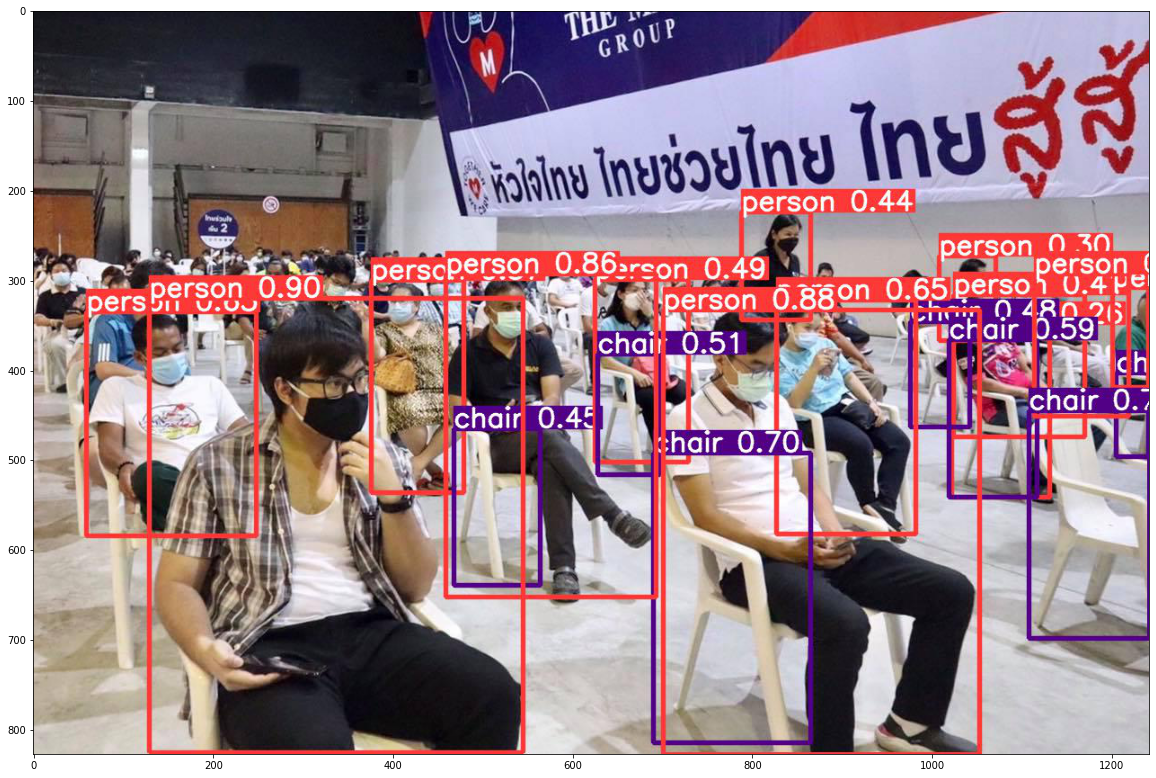

In [6]:
plt.figure(figsize=(20,20))

plt.imshow(io.imread("/content/results/image0.jpg"))